In [1]:
import pandas as pd
import gzip

# Load the filtered_ID1.csv file to get the list of IDs
filtered_ids_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/main/filtered SNV/filtered_ID5.csv')

# Display the dataframe
filtered_ids_df.head()

,chr,pos,Ref_allele,Alt_allele,Depth_total,Depth_ref,Depth_alt,SVM_pos_score,LDrefine_twoLoci_score,LDrefine_trioLoci_score,LDrefine_merged_score,BAF_alt
0,chr20,30377565,G,T,58,40,18,0.99826,NaN,NaN,NaN,0.310345


In [2]:
# Load the chr20.gl.filter.hc.cell.mat.gz file
with gzip.open('/uoa/home/t05cj23/sharedscratch/main/output/ID5/somatic/chr20.gl.filter.hc.cell.mat.gz', 'rt') as f:
    chr20_df = pd.read_csv(f, sep='\t', header=None)

# Rename the first four columns
chr20_df.rename(columns={0: "chr", 1: "pos", 2: "ref_ale", 3: "alt_ale"}, inplace=True)

# Display the first few rows of the dataframe
chr20_df.head()

,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,7140,7141,7142,7143,7144,7145,7146,7147,7148,7149
0,chr20,297191,C,T,15,0.0,8.0,2.0,3.0,0|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,chr20,410752,G,T,685,545.0,0.0,7.0,0.0,NaN,...,0/0,1/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
2,chr20,430911,C,T,365,355.0,0.0,8.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,chr20,430935,A,C,349,223.0,0.0,5.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,chr20,430940,A,C,338,135.0,0.0,8.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [3]:
# Extract the 'chr' and 'pos' columns from the filtered_ids_df
filtered_chr = filtered_ids_df['chr'].iloc[0]
filtered_pos = filtered_ids_df['pos'].iloc[0]

# Filter the chr20_df based on the 'chr' and 'pos' columns
filtered_chr20_df = chr20_df[(chr20_df['chr'] == filtered_chr) & (chr20_df['pos'] == filtered_pos)]

# Display the filtered dataframe
filtered_chr20_df

,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,7140,7141,7142,7143,7144,7145,7146,7147,7148,7149
418,chr20,30377565,G,T,292,132.0,0.0,156.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [4]:
# Define the order of columns: 1-4, 19-20, and then the rest
columns_to_display = list(filtered_chr20_df.columns[:4])+list(filtered_chr20_df.columns[18:])

# Reorder the dataframe based on the new column order
reordered_df = filtered_chr20_df[columns_to_display]

# Display the reordered dataframe
display(reordered_df)

#Read the file to replace the column header with single-cell sequences
cell_seq_file = pd.read_csv("/uoa/home/t05cj23/sharedscratch/main/output/ID5/somatic/chr20.cell_snv.cellID.filter.csv", usecols=['cell'])

#Transpose the rows to columns
cell_seq = cell_seq_file.T

#Display the single-cell sequences
display(cell_seq)


,chr,pos,ref_ale,alt_ale,18,19,20,21,22,23,...,7140,7141,7142,7143,7144,7145,7146,7147,7148,7149
418,chr20,30377565,G,T,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


,0,1,2,3,4,5,6,7,8,9,...,7122,7123,7124,7125,7126,7127,7128,7129,7130,7131
cell,GGCAATTGTGACAAAT-1,CCACCTAAGTGCGTGA-1,CCACTACTCACCGTAA-1,CATTATCTCGTACCGG-1,CCATGTCAGCCCGAAA-1,CCATTCGGTTCACGGC-1,CCCTCCTTCAGCATGT-1,CACCTTGCATCATCCC-1,CACACTCAGATAGCAT-1,CACACAATCGGGAGTA-1,...,TTCTCCTTCACCAGGC-1,TTGGAACCACGAGGTA-1,TCTTTCCCATCGGTTA-1,TCGTACCCACTTAACG-1,TCGGGACAGAAACGCC-1,TCTATTGAGTCCTCCT-1,TCTGAGAAGCTTATCG-1,TGGCTGGCATGTTCCC-1,TGGCCAGCATCCGCGA-1,TGCCCATAGGATGTAT-1


In [5]:
# Extract the headers from the transposed cell sequence dataframe
new_headers = cell_seq.iloc[0, :].tolist()

# Create new column names for reordered_df starting from the 6th column onward
new_column_names = list(reordered_df.columns[:4]) + new_headers

# Check if the lengths match
if len(new_column_names) == len(reordered_df.columns):
    # Rename the columns in reordered_df
    reordered_df.columns = new_column_names
    # Display the reordered dataframe with the new column names
    display(reordered_df.head())

,chr,pos,ref_ale,alt_ale,GGCAATTGTGACAAAT-1,CCACCTAAGTGCGTGA-1,CCACTACTCACCGTAA-1,CATTATCTCGTACCGG-1,CCATGTCAGCCCGAAA-1,CCATTCGGTTCACGGC-1,...,TTCTCCTTCACCAGGC-1,TTGGAACCACGAGGTA-1,TCTTTCCCATCGGTTA-1,TCGTACCCACTTAACG-1,TCGGGACAGAAACGCC-1,TCTATTGAGTCCTCCT-1,TCTGAGAAGCTTATCG-1,TGGCTGGCATGTTCCC-1,TGGCCAGCATCCGCGA-1,TGCCCATAGGATGTAT-1
418,chr20,30377565,G,T,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [6]:
#Categorize Mutation Types

# Function to classify mutation status
def mutation(value):
    if value == '0/0':
        return '0'
    elif value in ['1/0', '0/1', '1/1']:
        return '1'
    else:
        return value 

# Apply the function to all columns in the reordered dataframe
mutation_df = reordered_df.map(mutation)

# Display the dataframe
print(mutation_df)

       chr       pos ref_ale alt_ale GGCAATTGTGACAAAT-1 CCACCTAAGTGCGTGA-1  \
418  chr20  30377565       G       T                  0                  0   

    CCACTACTCACCGTAA-1 CATTATCTCGTACCGG-1 CCATGTCAGCCCGAAA-1  \
418                  0                  0                  0   

    CCATTCGGTTCACGGC-1  ... TTCTCCTTCACCAGGC-1 TTGGAACCACGAGGTA-1  \
418                  0  ...                  0                  0   

    TCTTTCCCATCGGTTA-1 TCGTACCCACTTAACG-1 TCGGGACAGAAACGCC-1  \
418                  0                  0                  0   

    TCTATTGAGTCCTCCT-1 TCTGAGAAGCTTATCG-1 TGGCTGGCATGTTCCC-1  \
418                  0                  0                  0   

    TGGCCAGCATCCGCGA-1 TGCCCATAGGATGTAT-1  
418                  0                  0  

[1 rows x 7136 columns]


In [7]:
# Number of Cells with this particular Mutation

# Create a new column indicating the number of mutations in each row
mutation_df['mutation_count'] = mutation_df.apply(lambda row: sum(1 for val in row if val == '1'), axis=1)

final_df = mutation_df

# Display the final dataframe
print(final_df)

       chr       pos ref_ale alt_ale GGCAATTGTGACAAAT-1 CCACCTAAGTGCGTGA-1  \
418  chr20  30377565       G       T                  0                  0   

    CCACTACTCACCGTAA-1 CATTATCTCGTACCGG-1 CCATGTCAGCCCGAAA-1  \
418                  0                  0                  0   

    CCATTCGGTTCACGGC-1  ... TTGGAACCACGAGGTA-1 TCTTTCCCATCGGTTA-1  \
418                  0  ...                  0                  0   

    TCGTACCCACTTAACG-1 TCGGGACAGAAACGCC-1 TCTATTGAGTCCTCCT-1  \
418                  0                  0                  0   

    TCTGAGAAGCTTATCG-1 TGGCTGGCATGTTCCC-1 TGGCCAGCATCCGCGA-1  \
418                  0                  0                  0   

    TGCCCATAGGATGTAT-1 mutation_count  
418                  0             58  

[1 rows x 7137 columns]


In [8]:
# Create a column with information of col 1-4 is merged to one

def generate_names(df):
    df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)
    return df

snv_id_set = generate_names(final_df)

print(snv_id_set)

       chr       pos ref_ale alt_ale GGCAATTGTGACAAAT-1 CCACCTAAGTGCGTGA-1  \
418  chr20  30377565       G       T                  0                  0   

    CCACTACTCACCGTAA-1 CATTATCTCGTACCGG-1 CCATGTCAGCCCGAAA-1  \
418                  0                  0                  0   

    CCATTCGGTTCACGGC-1  ... TCTTTCCCATCGGTTA-1 TCGTACCCACTTAACG-1  \
418                  0  ...                  0                  0   

    TCGGGACAGAAACGCC-1 TCTATTGAGTCCTCCT-1 TCTGAGAAGCTTATCG-1  \
418                  0                  0                  0   

    TGGCTGGCATGTTCCC-1 TGGCCAGCATCCGCGA-1 TGCCCATAGGATGTAT-1 mutation_count  \
418                  0                  0                  0             58   

                  snvID  
418  chr20:30377565:G:T  

[1 rows x 7138 columns]


/tmp/ipykernel_4085529/1131646160.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)


In [9]:
#No of cells having particular mutations

# Identify columns with 'mutation' values
mutation_columns = mutation_df.columns[mutation_df.eq('1').any()]

# Convert the index object to a list
mutation_columns_list = mutation_columns.tolist()

# Create a new dataframe from the list
cell_mut_df = pd.DataFrame(mutation_columns_list, columns=['Mutation_Columns'])

# Display the new dataframe
print(cell_mut_df)

      Mutation_Columns
0   CACACAATCGGGAGTA-1
1   GACACGCGTGTGGCTC-1
2   CAACTAGAGTCGATAA-1
3   TAGCCGGGTGTTCTTT-1
4   CTAAGACTCCTCTAGC-1
5   ACTGTCCGTTCACCTC-1
6   AACTGGTAGAGTCTGG-1
7   CCTCTGACATTGCGGC-1
8   GCTGCGAGTCTCAACA-1
9   ACTTTCACACATGACT-1
10  ACGATACTCATGCAAC-1
11  CATCAGACACGGCCAT-1
12  GTGCAGCCAGCTGCAC-1
13  TCTCATAAGCGACGTA-1
14  TGTCCCAAGGGTCTCC-1
15  TTGCGTCTCACCGTAA-1
16  TTGCCGTGTTTCGCTC-1
17  TTCTCCTTCGGAAACG-1
18  TCTTTCCCACAGCGTC-1
19  TGCGTGGTCATCTGTT-1
20  CGGTTAACATATACCG-1
21  CGTCAGGGTAAGAGGA-1
22  CGTTAGACACTAGTAC-1
23  CACACAACATTCACTT-1
24  CAGATCATCGGTCTAA-1
25  AAGGCAGAGTAGGTGC-1
26  AATCCAGTCATATCGG-1
27  AAAGTAGCAATCTACG-1
28  ACGATACTCCATTCTA-1
29  ACGATACTCCCTCTTT-1
30  ACTGATGAGCTAAGAT-1
31  ACACCCTTCAGTACGT-1
32  ACCTTTAGTGGTCCGT-1
33  ATTATCCTCCACTGGG-1
34  ATTTCTGTCAGTTCGA-1
35  ATGGGAGCACAACTGT-1
36  AGGCCGTAGAGCTGCA-1
37  AGCTCTCGTAAGTTCC-1
38  AGCGTATCAACTGCTA-1
39  ATCACGACAGCGAACA-1
40  ATCATCTGTCCCTACT-1
41  TACGGATCAAGCTGAG-1
42  GTTTCTA

In [10]:
#Extract the sequence and get info from Randolph metadata

# Load Randolph metadata TSV file
import re
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_mut_df['Extracted_CellID'] = cell_mut_df['Mutation_Columns'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_df = pd.merge(cell_mut_df, randolph_metadata, on='Extracted_CellID', how='left')

display(merged_df[['Extracted_CellID', 'celltype', 'Batch']])


,Extracted_CellID,celltype,Batch
0,CACACAATCGGGAGTA,CD4_T,B15_c2
1,GACACGCGTGTGGCTC,infected_monocytes,B15_c1
2,CAACTAGAGTCGATAA,monocytes,B1_c2
3,CAACTAGAGTCGATAA,CD8_T,B14_c1
4,TAGCCGGGTGTTCTTT,CD8_T,B13_c2
...,...,...,...
57,CTTCTCTGTCAGAAGC,CD4_T,B1_c2
58,GGTGAAGAGTAGATGT,CD4_T,B1_c2
59,GCATACATCTGCGGCA,CD8_T,B1_c2
60,GCAAACTAGCAGGCTA,CD4_T,B1_c2


In [11]:
# Filter the results to the batch ID for the partiular dataset

# ID5 = SRR13194372 = B1_c2 [batch ID data retrieved from sra metadata file]

# Define the batch identifier to filter by
batch_to_filter = 'B1_c2'

# Filter the DataFrame for the specific batch identifier
filtered_df = merged_df[merged_df['Batch'] == batch_to_filter]
count_rows = len(filtered_df)

# Display the filtered DataFrame
print(f'Total number of cells with this mutation = {count_rows}')
display(filtered_df[['Extracted_CellID', 'celltype', 'Batch']])


Total number of cells with this mutation = 46


,Extracted_CellID,celltype,Batch
2,CAACTAGAGTCGATAA,monocytes,B1_c2
6,ACTGTCCGTTCACCTC,B,B1_c2
8,AACTGGTAGAGTCTGG,CD4_T,B1_c2
18,TGTCCCAAGGGTCTCC,NK,B1_c2
19,TTGCGTCTCACCGTAA,CD4_T,B1_c2
20,TTGCCGTGTTTCGCTC,B,B1_c2
21,TTCTCCTTCGGAAACG,CD4_T,B1_c2
22,TCTTTCCCACAGCGTC,CD4_T,B1_c2
23,TGCGTGGTCATCTGTT,CD4_T,B1_c2
24,CGGTTAACATATACCG,NK,B1_c2


In [12]:
#Cell Type Count for Mutated

# Create DataFrame
df = pd.DataFrame(filtered_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
cell_type_counts = df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# List unique cell types
unique_cell_types = df['celltype'].unique()

# Display results
print("Cell Type Counts by SOC_indiv_ID:")
print(cell_type_counts)

Cell Type Counts by SOC_indiv_ID:
SOC_indiv_ID  celltype          
HMN83551      CD8_T                  3
              CD4_T                  2
              B                      1
              monocytes              1
HMN83552      CD4_T                 11
              CD8_T                  7
              NK                     4
              infected_monocytes     1
              monocytes              1
HMN83558      CD4_T                  9
              B                      5
              highly_infected        1
Name: count, dtype: int64


In [13]:
# Retrieve age from donor metadata

# Read the donor metadata file
donor_metadata_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/donor_metadata_with_batchid.csv')

#Selecting the required columns
donor_age_df = donor_metadata_df[['indiv_ID', 'batchID', 'age']]
# Merge the DataFrames
result_df = pd.merge(filtered_df, donor_age_df, left_on=['SOC_indiv_ID', 'Batch'], right_on=['indiv_ID', 'batchID'], how='left')

# Display the result
count_rows = len(result_df)
print(f'No. of Rows = {count_rows}')
display(result_df[['Extracted_CellID', 'SOC_indiv_ID','celltype', 'Batch', 'age', 'SOC_infection_status']])

No. of Rows = 46


,Extracted_CellID,SOC_indiv_ID,celltype,Batch,age,SOC_infection_status
0,CAACTAGAGTCGATAA,HMN83552,monocytes,B1_c2,54,flu
1,ACTGTCCGTTCACCTC,HMN83558,B,B1_c2,47,flu
2,AACTGGTAGAGTCTGG,HMN83558,CD4_T,B1_c2,47,flu
3,TGTCCCAAGGGTCTCC,HMN83552,NK,B1_c2,54,flu
4,TTGCGTCTCACCGTAA,HMN83552,CD4_T,B1_c2,54,flu
5,TTGCCGTGTTTCGCTC,HMN83558,B,B1_c2,47,flu
6,TTCTCCTTCGGAAACG,HMN83551,CD4_T,B1_c2,41,flu
7,TCTTTCCCACAGCGTC,HMN83552,CD4_T,B1_c2,54,flu
8,TGCGTGGTCATCTGTT,HMN83552,CD4_T,B1_c2,54,flu
9,CGGTTAACATATACCG,HMN83552,NK,B1_c2,54,flu


In [14]:
#For check total cells present in the sample

# Extract column headers
headers = mutation_df.columns.tolist()

# Slice headers after the 4th column
headers_after_4th = headers[4:5947]

total_cells_list = [{'Column': header} for header in headers_after_4th]
cell_total_df = pd.DataFrame(total_cells_list)

# Display the new DataFrame
count_rows = len(cell_total_df)
print(f'Total number of columns after the 4th column = {count_rows}')

# Load Randolph metadata TSV file
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_total_df['Extracted_CellID'] = cell_total_df['Column'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_total_df = pd.merge(cell_total_df, randolph_metadata, on='Extracted_CellID', how='left')

count_rows = len(merged_total_df)
print(f'Total number of cells = {count_rows}')
print(merged_total_df)

Total number of columns after the 4th column = 5943
Total number of cells = 6848
                  Column  Extracted_CellID                   CellID  \
0     GGCAATTGTGACAAAT-1  GGCAATTGTGACAAAT  B15_c2_GGCAATTGTGACAAAT   
1     CCACCTAAGTGCGTGA-1  CCACCTAAGTGCGTGA  B15_c2_CCACCTAAGTGCGTGA   
2     CCACCTAAGTGCGTGA-1  CCACCTAAGTGCGTGA   B2_c1_CCACCTAAGTGCGTGA   
3     CCACTACTCACCGTAA-1  CCACTACTCACCGTAA  B12_c2_CCACTACTCACCGTAA   
4     CCACTACTCACCGTAA-1  CCACTACTCACCGTAA  B15_c2_CCACTACTCACCGTAA   
...                  ...               ...                      ...   
6843  CATGGCGAGTGTGAAT-1  CATGGCGAGTGTGAAT   B1_c2_CATGGCGAGTGTGAAT   
6844  CATGGCGAGTGGCACA-1  CATGGCGAGTGGCACA   B1_c2_CATGGCGAGTGGCACA   
6845  CATGGCGAGTCGTACT-1  CATGGCGAGTCGTACT   B1_c2_CATGGCGAGTCGTACT   
6846  CATGGCGAGGGATCTG-1  CATGGCGAGGGATCTG   B1_c2_CATGGCGAGGGATCTG   
6847  CATGGCGAGGATGCGT-1  CATGGCGAGGATGCGT   B1_c2_CATGGCGAGGATGCGT   

                celltype   Batch sample_condition SOC_indiv_ID  \


In [15]:
#For calculating total cells present in this sample

# Define the batch identifier to filter by
filter_batch = 'B1_c2'

# Filter the DataFrame for the specific batch identifier
sort_cell_total_df = merged_total_df[merged_total_df['Batch'] == filter_batch]
count_rows = len(sort_cell_total_df)

# Display the filtered DataFrame
print(f'Total number of cells = {count_rows}')
display(sort_cell_total_df[['Extracted_CellID','celltype', 'Batch', 'SOC_indiv_ID', 'SOC_infection_status']])

Total number of cells = 3146


,Extracted_CellID,celltype,Batch,SOC_indiv_ID,SOC_infection_status
5,CATTATCTCGTACCGG,CD4_T,B1_c2,HMN83552,flu
11,CACACTCAGATAGCAT,CD8_T,B1_c2,HMN83558,flu
20,CGTGTCTAGGCTCATT,CD8_T,B1_c2,HMN83551,flu
35,CGACTTCGTACGCTGC,CD4_T,B1_c2,HMN83551,flu
38,CGAGCACAGCTACCGC,CD8_T,B1_c2,HMN83551,flu
...,...,...,...,...,...
6843,CATGGCGAGTGTGAAT,CD4_T,B1_c2,HMN83552,flu
6844,CATGGCGAGTGGCACA,CD4_T,B1_c2,HMN83552,flu
6845,CATGGCGAGTCGTACT,CD4_T,B1_c2,HMN83551,flu
6846,CATGGCGAGGGATCTG,highly_infected,B1_c2,HMN83551,flu


In [16]:
# Total Cell Type Count

# Create DataFrame
total_df = pd.DataFrame(sort_cell_total_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
total_cell_type_counts = total_df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# Display results
#print("Cell Type Counts:", total_cell_type_counts)

total_cell_type_df = pd.DataFrame(total_cell_type_counts)

display(total_cell_type_df)

count
SOC_indiv_ID celltype                 
HMN83551     CD4_T                 524
             CD8_T                 126
             monocytes              65
             B                      47
             infected_monocytes     46
             NK                     30
             highly_infected        25
             neutrophils             3
HMN83552     CD4_T                 864
             NK                    129
             CD8_T                 121
             infected_monocytes    103
             monocytes              56
             B                      32
             NK_high_response       23
             highly_infected        21
             DC                      2
             NKT                     2
             neutrophils             2
HMN83558     CD4_T                 653
             B                     142
             infected_monocytes     38
             CD8_T                  31
             monocytes              31
             highly_infected        13
             NK                     10
             DC                      3
             neutrophils             2
             NKT                     1
             NK_high_response        1

In [17]:
#Mutation Rate Calculation

# Create DataFrames
mutation_cell_type_df = pd.DataFrame(cell_type_counts)
total_cell_type_df = pd.DataFrame(total_cell_type_df)

# Group by SOC_indiv_ID and celltype to sum total occurrences
total_cell_type_counts = total_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'total_cell_type_count'})

# Group by SOC_indiv_ID and celltype to sum mutated occurrences
mutation_cell_type_counts = mutation_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'mut_cell_type_count'})

# Merge the DataFrames on 'SOC_indiv_ID' and 'celltype'
mutation_rate_df = pd.merge(total_cell_type_counts, mutation_cell_type_counts, on=['SOC_indiv_ID', 'celltype'], how='left')

# Define the human chr20 length
chromosome_length = 64444167 

# Calculate the mutation rate for each cell type
mutation_rate_df['mutation_rate'] = mutation_rate_df['mut_cell_type_count'] / mutation_rate_df['total_cell_type_count'] / chromosome_length

# Display results
count_rows = len(mutation_rate_df)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates:", mutation_rate_df)

Total number of rows = 30


'Cell Type Counts by SOC_indiv_ID and Mutation Rates:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83551,B,47,1.0,3.301555e-10
1,HMN83551,CD4_T,524,2.0,5.922637e-11
2,HMN83551,CD8_T,126,3.0,3.694597e-10
3,HMN83551,NK,30,NaN,NaN
4,HMN83551,highly_infected,25,NaN,NaN
5,HMN83551,infected_monocytes,46,NaN,NaN
6,HMN83551,monocytes,65,1.0,2.387278e-10
7,HMN83551,neutrophils,3,NaN,NaN
8,HMN83552,B,32,NaN,NaN
9,HMN83552,CD4_T,864,11.0,1.975583e-10


In [18]:
# Filter and Remove the NaN values from Mutation Rate Calculation

# Sort the DataFrame by SOC_indiv_ID and celltype
mutation_rate_df_sorted = mutation_rate_df.sort_values(by=['SOC_indiv_ID', 'celltype'])

# Remove rows with NaN values
mutation_rate_df_clean = mutation_rate_df_sorted.dropna(subset=['mut_cell_type_count'])

# Display results
# Display the new DataFrame
count_rows = len(mutation_rate_df_clean)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):", mutation_rate_df_clean)

Total number of rows = 12


'Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83551,B,47,1.0,3.301555e-10
1,HMN83551,CD4_T,524,2.0,5.922637e-11
2,HMN83551,CD8_T,126,3.0,3.694597e-10
6,HMN83551,monocytes,65,1.0,2.387278e-10
9,HMN83552,CD4_T,864,11.0,1.975583e-10
10,HMN83552,CD8_T,121,7.0,8.976955e-10
12,HMN83552,NK,129,4.0,4.811568e-10
16,HMN83552,infected_monocytes,103,1.0,1.506535e-10
17,HMN83552,monocytes,56,1.0,2.770948e-10
19,HMN83558,B,142,5.0,5.463841e-10


In [25]:
#Retrieve Age information

# Merge the DataFrames on SOC_indiv_ID and indiv_ID
age_cell_df = pd.merge(mutation_rate_df_clean, donor_age_df, left_on='SOC_indiv_ID', right_on='indiv_ID', how='left')

# Drop unnecessary columns from donor_age_df if needed (e.g., 'indiv_ID' column)
age_cell_df = age_cell_df.drop(columns=['indiv_ID'])

# Display the updated DataFrame with age information
count_rows = len(age_cell_df)
print(f'Total number of rows = {count_rows}')
#display("Updated DataFrame with Age Information:", age_cell_df)

# Filter rows where batchID is 'B1_c1'
result_filtered_df5 = age_cell_df.loc[age_cell_df['batchID'] == 'B1_c2']

# Display the filtered DataFrame and count of rows
count_filtered_rows = len(result_filtered_df5)
print(f'Total number of rows for batchID B1_c2 = {count_filtered_rows}')
display("Filtered DataFrame with Age Information for batchID B1_c2:", result_filtered_df5)

result_filtered_df5.to_csv('/uoa/home/t05cj23/sharedscratch/main/output/ID5/result_filtered_df5.csv')

Total number of rows = 24
Total number of rows for batchID B1_c2 = 12


'Filtered DataFrame with Age Information for batchID B1_c2:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate,batchID,age
1,HMN83551,B,47,1.0,3.301555e-10,B1_c2,41
3,HMN83551,CD4_T,524,2.0,5.922637e-11,B1_c2,41
5,HMN83551,CD8_T,126,3.0,3.694597e-10,B1_c2,41
7,HMN83551,monocytes,65,1.0,2.387278e-10,B1_c2,41
9,HMN83552,CD4_T,864,11.0,1.975583e-10,B1_c2,54
11,HMN83552,CD8_T,121,7.0,8.976955e-10,B1_c2,54
13,HMN83552,NK,129,4.0,4.811568e-10,B1_c2,54
15,HMN83552,infected_monocytes,103,1.0,1.506535e-10,B1_c2,54
17,HMN83552,monocytes,56,1.0,2.770948e-10,B1_c2,54
19,HMN83558,B,142,5.0,5.463841e-10,B1_c2,47


Not enough variation in 'age' values for cell type: NK
Not enough variation in 'age' values for cell type: infected_monocytes
Not enough variation in 'age' values for cell type: highly_infected


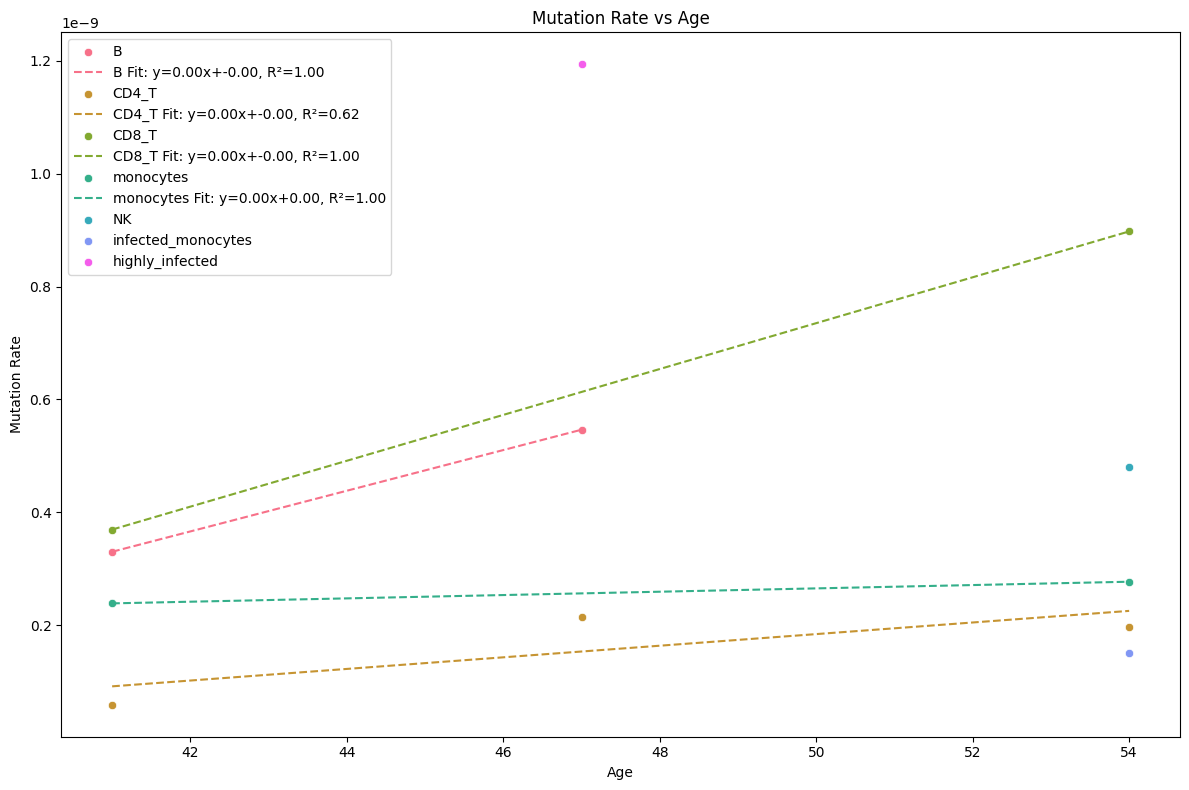

In [26]:
#Plot Graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ensure the DataFrame has no NaN values in 'age' or 'mutation_rate'
result_filtered_df = result_filtered_df5.dropna(subset=['age', 'mutation_rate'])

# Get unique cell types
cell_types = result_filtered_df['celltype'].unique()

# Define a color palette for cell types
palette = sns.color_palette("husl", len(cell_types))  # Using a distinct color palette

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot each cell type with different colors
for i, cell_type in enumerate(cell_types):
    cell_subset = result_filtered_df[result_filtered_df['celltype'] == cell_type]
    
    # Check if cell_subset is not empty
    if cell_subset.empty:
        continue
    
    # Plot scatter plot
    sns.scatterplot(x='age', y='mutation_rate', data=cell_subset, color=palette[i], marker='o', label=cell_type)
    
    # Check if there is variation in 'age' values
    if len(cell_subset['age'].unique()) > 1:
        # Fit line of best fit
        slope, intercept, r_value, p_value, std_err = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
        
        # Generate line of best fit
        age_range = np.linspace(cell_subset['age'].min(), cell_subset['age'].max(), 100)
        mutation_rate_fit = intercept + slope * age_range
        
        # Plot line of best fit with label
        plt.plot(age_range, mutation_rate_fit, color=palette[i], linestyle='--',
                 label=f'{cell_type} Fit: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    else:
        print(f"Not enough variation in 'age' values for cell type: {cell_type}")

# Set titles and labels
plt.title('Mutation Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Mutation Rate')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [27]:
#Create a summary table of the graph

# Ensure the DataFrame has no NaN values in 'age' or 'mutation_rate'
result_filtered_df = result_filtered_df5.dropna(subset=['age', 'mutation_rate'])

# Get unique cell types
cell_types = result_filtered_df['celltype'].unique()

# Prepare lists to hold the summary information
summary_data = {
    'Cell Type': [],
    'Slope': [],
    'Intercept': [],
    'R-squared': [],
    'P-value': [],
    'Std Error': []
}

# Calculate regression parameters for each cell type
for cell_type in cell_types:
    cell_subset = result_filtered_df[result_filtered_df['celltype'] == cell_type]
    
    # Check if there is variation in 'age' values
    if len(cell_subset['age'].unique()) > 1:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
        
        # Append the results to the summary data
        summary_data['Cell Type'].append(cell_type)
        summary_data['Slope'].append(slope)
        summary_data['Intercept'].append(intercept)
        summary_data['R-squared'].append(r_value**2)
        summary_data['P-value'].append(p_value)
        summary_data['Std Error'].append(std_err)
    else:
        print(f"Not enough variation in 'age' values for cell type: {cell_type}")
        
# Create a DataFrame from the summary data
summary_df5 = pd.DataFrame(summary_data)

# Display the summary table
summary_df5[['Cell Type', 'Slope', 'Intercept', 'R-squared']]

Not enough variation in 'age' values for cell type: NK
Not enough variation in 'age' values for cell type: infected_monocytes
Not enough variation in 'age' values for cell type: highly_infected


,Cell Type,Slope,Intercept,R-squared
0,B,3.603810e-11,-1.147407e-09,1.000000
1,CD4_T,1.028345e-11,-3.298660e-10,0.620106
2,CD8_T,4.063352e-11,-1.296515e-09,1.000000
3,monocytes,2.951305e-12,1.177243e-10,1.000000
